#  Laboratorio 2

##### Gladys Andrea Rodríguez Guerrero  -  20006107

### Librerías a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carga de Dataset

In [2]:
data = pd.read_csv('train.csv')

print(str(data.shape) + '\n')

data.head()

(891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# eliminando columna ID

data.drop('PassengerId', axis=1, inplace=True)

print(str(data.shape))

(891, 11)


### Análisis de Datos (toma de decisiones)

##### 2.1 Análisis del Taget

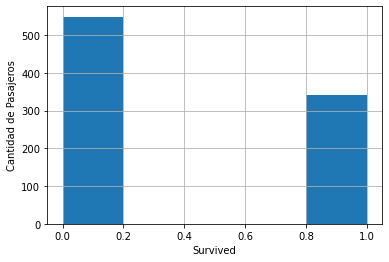

In [4]:
data['Survived'].hist(bins=5, density=False)
plt.xlabel("Survived")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

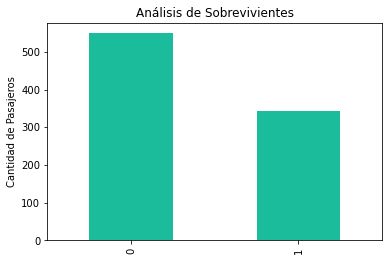

In [5]:
data['Survived'].value_counts().plot(kind='bar', color = '#1ABC9C')
plt.ylabel("Cantidad de Pasajeros")
plt.title('Análisis de Sobrevivientes')
plt.show()

##### * Análisis de tipo de variables en X

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
#cat_vars

#Agregamos variables que por definición son categóricas
cat_vars = cat_vars + ['Pclass'] + ['SibSp'] + ['Parch']
#cat_vars

# Cantidad de variables categóricas
len(cat_vars)

8

In [8]:
#Forzando a todas las variables de la lista como categóticas
data[cat_vars] = data[cat_vars].astype('O')

In [9]:
# variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
#num_vars

In [10]:
len(num_vars)

2

##### * Análisis de Valores Faltantes

In [11]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

3

In [12]:
# Proporcion de NA en cada variable
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

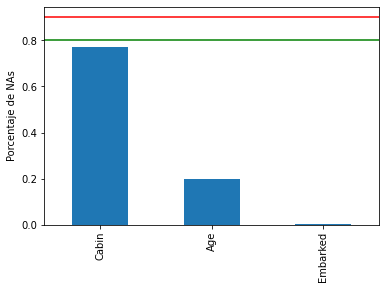

In [13]:
# graficando porcentajes de NA
data[var_with_na].isnull().mean().sort_values(ascending=False).plot.bar()
plt.ylabel("Porcentaje de NAs")
plt.axhline(y=0.9, color="r")
plt.axhline(y=0.8, color="g")

In [14]:
# variables categóricas con NA
cat_na = [var for var in cat_vars if var in var_with_na]
cat_na

['Cabin', 'Embarked']

In [15]:
# variables numéricas con NA
num_na = [var for var in num_vars if var in var_with_na]
num_na

['Age']

In [17]:
print("{} variables numéricas con NA".format(len(num_na)))
print("{} variables categóticas con NA".format(len(cat_na)))

1 variables numéricas con NA
2 variables categóticas con NA


##### * Verificación del impacto del NA contra el Target

In [18]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

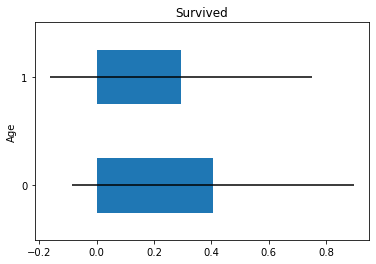

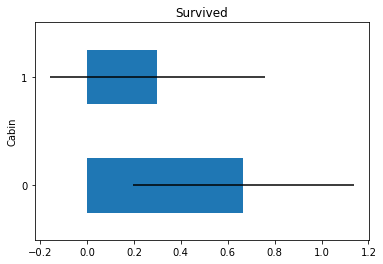

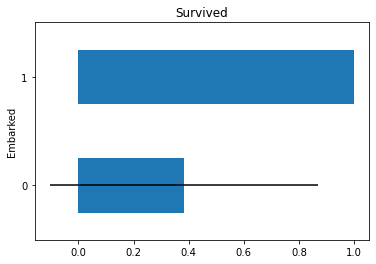

In [20]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')